In [1]:
import seaborn as sns 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

j=pd.read_json('data.json', lines=True)
j.to_csv('data.csv')

<Axes: xlabel='authors', ylabel='Count'>

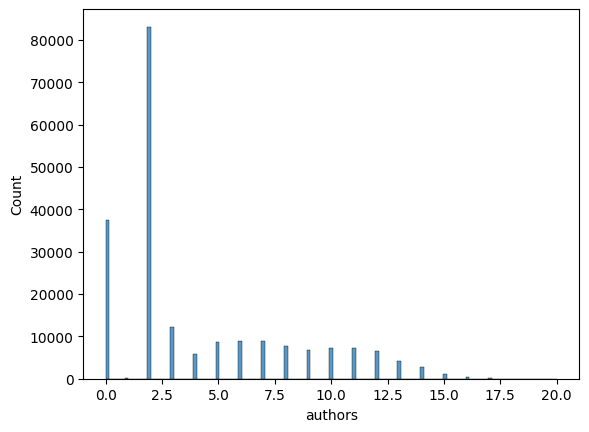

In [3]:
lenghtes = j.authors.apply(lambda a:a.split()).map(len)
sns.histplot(lenghtes)

<Axes: xlabel='headline', ylabel='Count'>

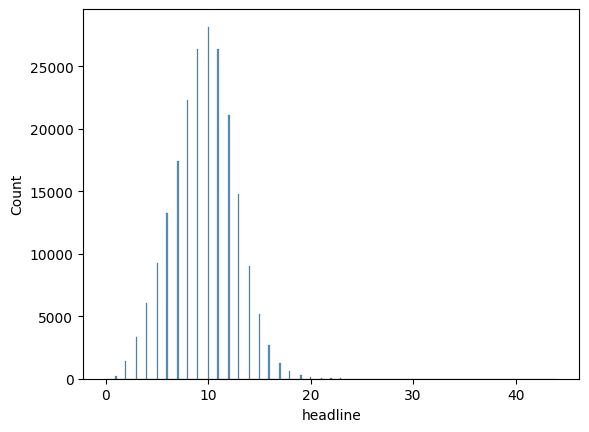

In [4]:
lenghtes = j.headline.apply(lambda a:a.split()).map(len)
sns.histplot(lenghtes)

In [5]:
lenghtes = j.short_description.apply(lambda a:a.split()).map(len)
sns.histplot(lenghtes)

KeyboardInterrupt: 

In [7]:
from collections import Counter

In [8]:
c  =  Counter(j.category)
print('3 most popular cateories',c.most_common(3), sep='\n')
print('3 least popular cateories',c.most_common()[:-3-1:-1] , sep='\n')

3 most popular cateories
[('POLITICS', 35602), ('WELLNESS', 17945), ('ENTERTAINMENT', 17362)]
3 least popular cateories
[('EDUCATION', 1014), ('CULTURE & ARTS', 1074), ('LATINO VOICES', 1130)]


Text(0.5, 1.0, 'Categories histogram')

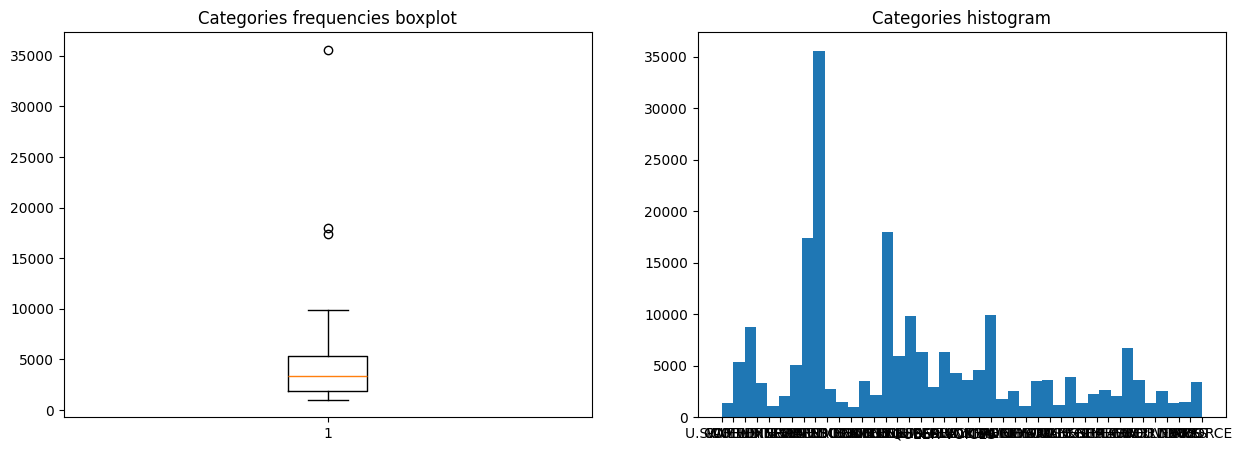

In [9]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].boxplot(list(c.values()));
ax[1].hist(j.category, bins=42);
ax[0].set_title('Categories frequencies boxplot')
ax[1].set_title('Categories histogram')

In [10]:
import nltk
from nltk.tokenize import word_tokenize
from string import punctuation

In [11]:

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/valeriy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/valeriy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
import re
from nltk.corpus import stopwords
def clean(row):
    
    row = row.lower()
    row = re.sub('[^a-z A-Z 0-9]+', ' ', row)
    row = " ".join([word for word in row.split() if word not in stopwords.words('english')])
    
    return row

In [14]:
def clean_dataframe(j):
    j['headline'] = j['headline'].apply(clean)
    j['short_description'] = j['short_description'].apply(clean)
    j['link'] = j['link'].apply(clean)
    j ['authors'] = j['authors'].apply(clean)
    return j

In [15]:
data_cleaned = clean_dataframe(j)
data_cleaned.to_csv('data_cleaned.csv', index=False)


In [18]:

data_cleaned = pd.read_csv('data_cleaned.csv')
data_cleaned.isna().sum()


link                     0
headline                67
category                 0
short_description    20179
authors              37419
date                     0
dtype: int64

In [21]:
data_cleaned[data_cleaned['headline'].apply(len) == 1]

,link,headline,category,short_description,authors,date
30781,https www huffingtonpost com entry 1 us 595ff6...,1,QUEER VOICES,week lgbt healthlink program centerlink resear...,lgbt healthlink contributorlgbt healthlink com...,2017-07-07
103082,https www huffingtonpost com entry b b 7006396...,b,COMEDY,nan,marcia liss contributor almost famous cartoonist,2015-04-05
156745,https www huffingtonpost com entry diys us 5b9...,u,HOME & LIVING,august 8th little time left summer decided bri...,yanic simard contributor principal designer to...,2013-08-14


In [20]:
columns_to_convert = ['headline', 'short_description', 'authors', 'link']
for col in columns_to_convert:
    data_cleaned[col] = data_cleaned[col].astype(str)


In [22]:
print(data_cleaned['headline'].str.isspace().sum())
print(data_cleaned['short_description'].str.isspace().sum())
print(data_cleaned['authors'].str.isspace().sum())
print(data_cleaned['link'].str.isspace().sum())
print(min(data_cleaned['headline'].apply(len)))
print(min(data_cleaned['short_description'].apply(len)))
print(min(data_cleaned['authors'].apply(len)))
print(min(data_cleaned['link'].apply(len)))

0
0
0
0
1
1
2
44


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:

concat_f = lambda a : ' '.join(a)
grouped = data_cleaned.groupby('category').agg({'headline':concat_f, 'short_description':concat_f, 'authors':concat_f, 'link':concat_f}).reset_index()

In [18]:
def freq_ngrams(data, ngram_range=(1,1), column=''):
    cv = CountVectorizer(ngram_range=ngram_range)
    X = cv.fit_transform(data[column])
    count_values = X.toarray().sum(axis=0)
    ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
    ngram_freq.columns = ["frequency", "ngram"]

    return ngram_freq
    

<Axes: xlabel='frequency', ylabel='ngram'>

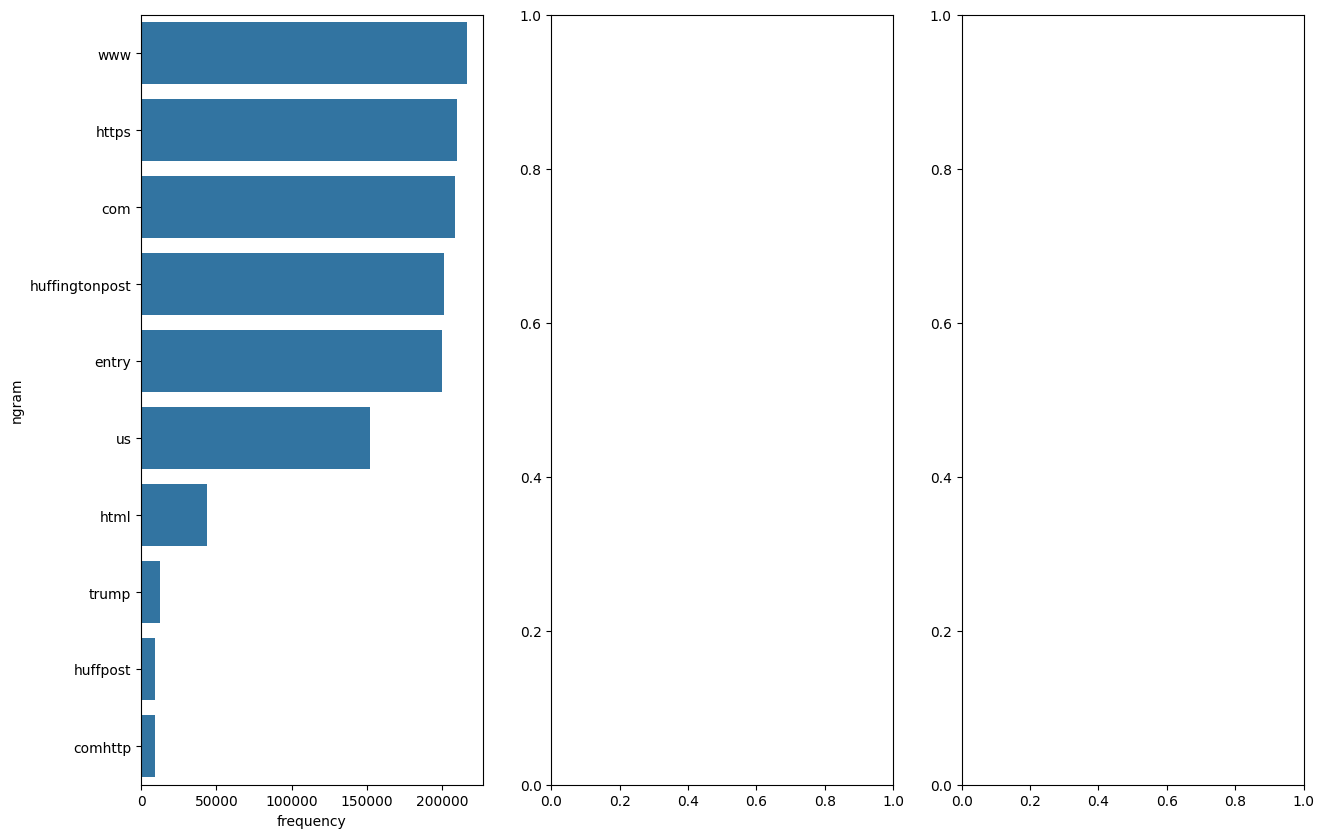

In [19]:
fig, ax = plt.subplots(1,3, figsize=(15,10))
ngram_freq = freq_ngrams(grouped, (1,1),column='link')
top_k = 10
sns.barplot(x=ngram_freq['frequency'][:top_k], y=ngram_freq['ngram'][:top_k], ax=ax[0])

<Axes: xlabel='frequency', ylabel='ngram'>

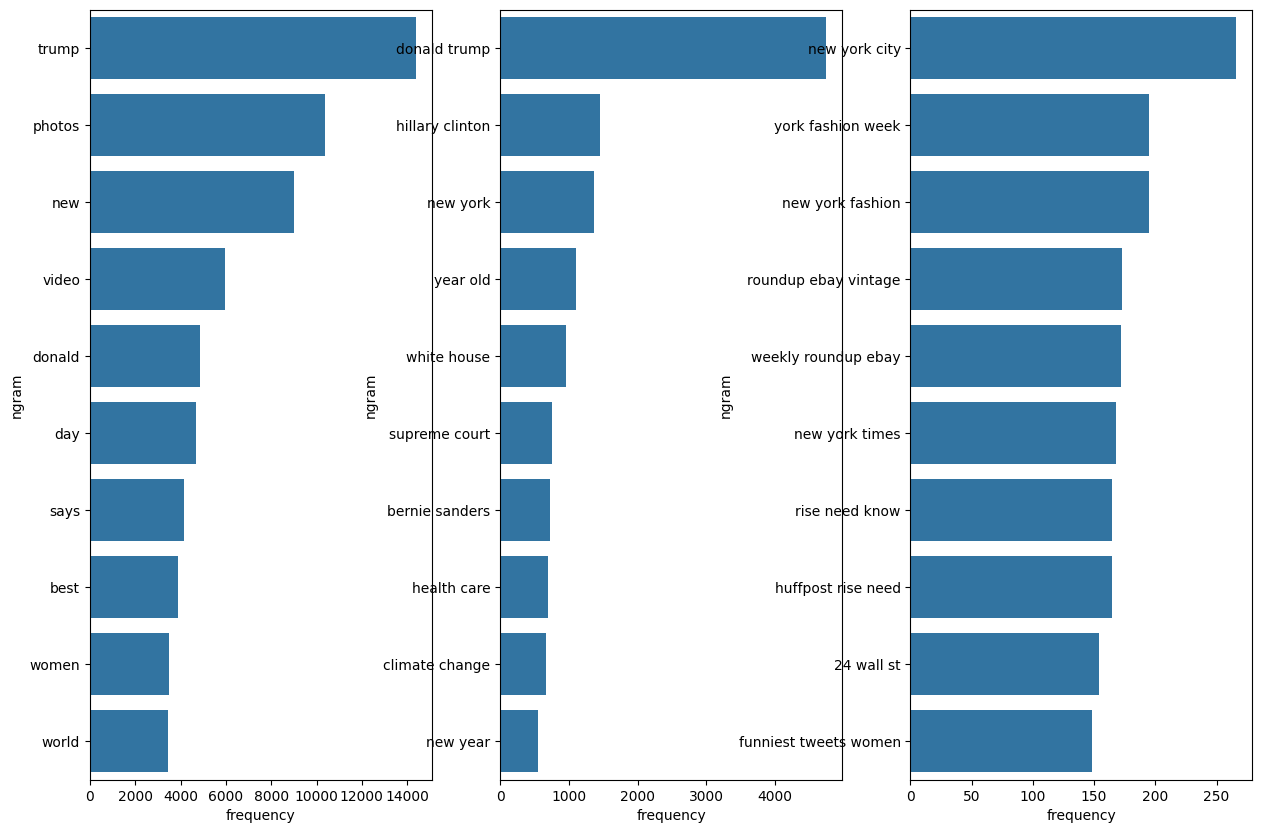

In [22]:
fig, ax = plt.subplots(1,3, figsize=(15,10))
ngram_freq = freq_ngrams(grouped, (1,1),column='headline')
top_k = 10
sns.barplot(x=ngram_freq['frequency'][:top_k], y=ngram_freq['ngram'][:top_k], ax=ax[0])

ngram_freq = freq_ngrams(grouped, (2,2),column='headline')
top_k = 10
sns.barplot(x=ngram_freq['frequency'][:top_k], y=ngram_freq['ngram'][:top_k], ax=ax[1])

ngram_freq = freq_ngrams(grouped, (3,3),column='headline')
top_k = 10
sns.barplot(x=ngram_freq['frequency'][:top_k], y=ngram_freq['ngram'][:top_k], ax=ax[2])

<Axes: xlabel='frequency', ylabel='ngram'>

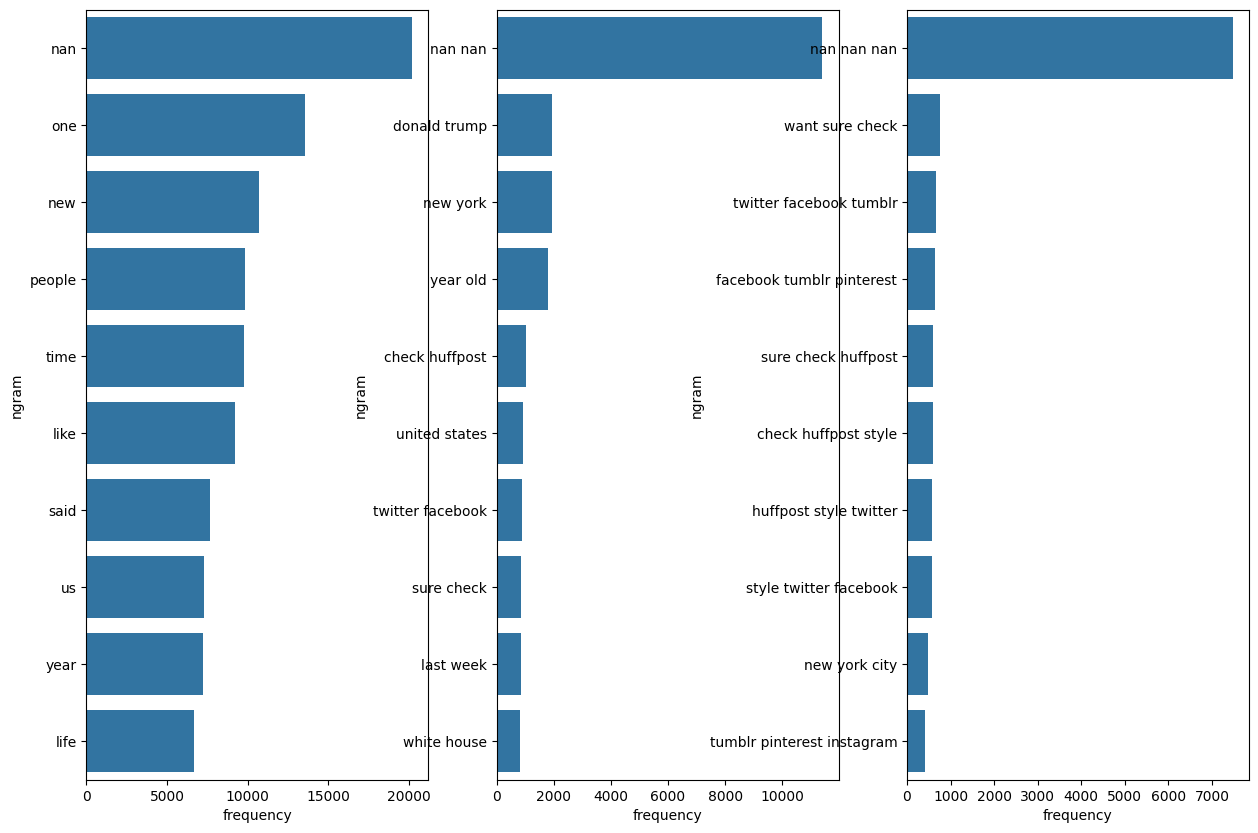

In [23]:
fig, ax = plt.subplots(1,3, figsize=(15,10))
ngram_freq = freq_ngrams(grouped, (1,1),column='short_description')
top_k = 10
sns.barplot(x=ngram_freq['frequency'][:top_k], y=ngram_freq['ngram'][:top_k], ax=ax[0])

ngram_freq = freq_ngrams(grouped, (2,2),column='short_description')
top_k = 10
sns.barplot(x=ngram_freq['frequency'][:top_k], y=ngram_freq['ngram'][:top_k], ax=ax[1])

ngram_freq = freq_ngrams(grouped, (3,3),column='short_description')
top_k = 10
sns.barplot(x=ngram_freq['frequency'][:top_k], y=ngram_freq['ngram'][:top_k], ax=ax[2])

<Axes: xlabel='frequency', ylabel='ngram'>

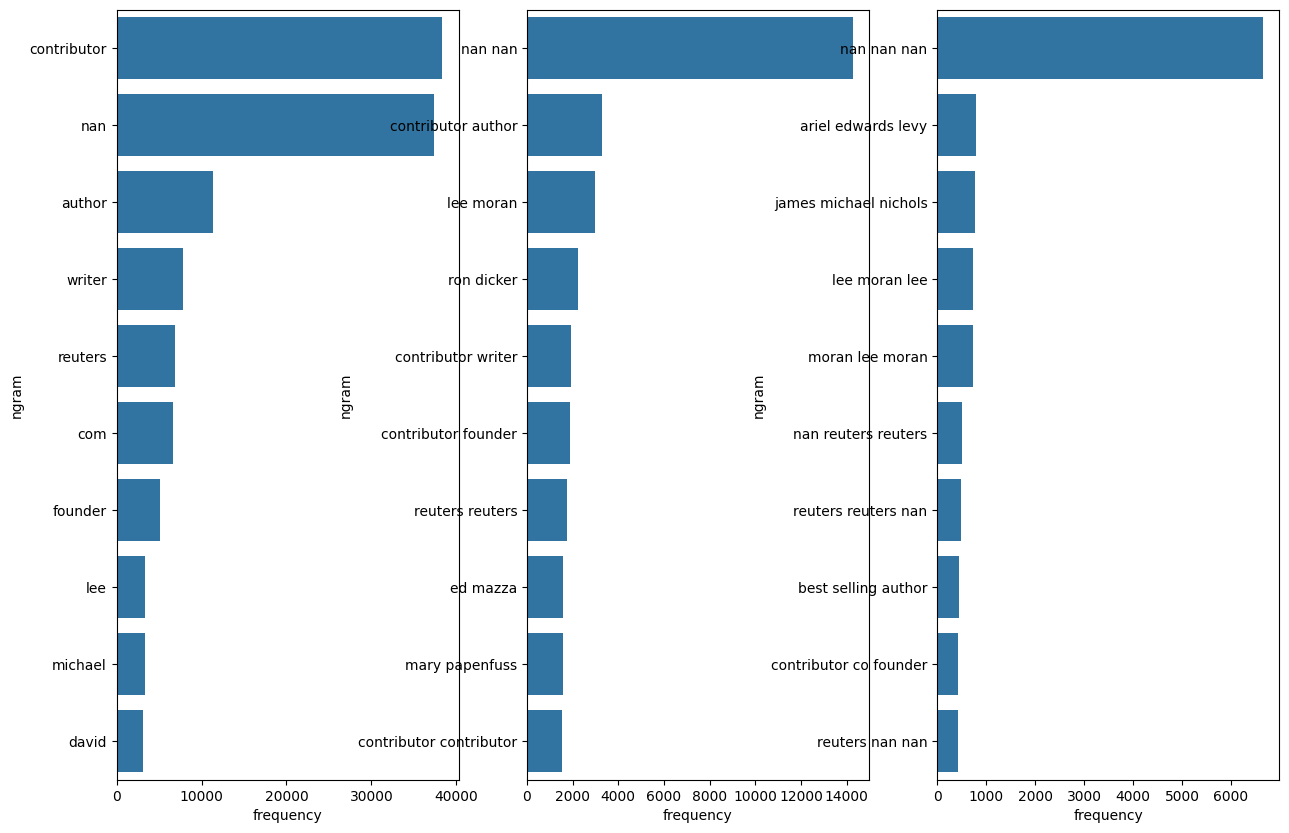

In [24]:
fig, ax = plt.subplots(1,3, figsize=(15,10))
ngram_freq = freq_ngrams(grouped, (1,1),column='authors')
top_k = 10
sns.barplot(x=ngram_freq['frequency'][:top_k], y=ngram_freq['ngram'][:top_k], ax=ax[0])

ngram_freq = freq_ngrams(grouped, (2,2),column='authors')
top_k = 10
sns.barplot(x=ngram_freq['frequency'][:top_k], y=ngram_freq['ngram'][:top_k], ax=ax[1])

ngram_freq = freq_ngrams(grouped, (3,3),column='authors')
top_k = 10
sns.barplot(x=ngram_freq['frequency'][:top_k], y=ngram_freq['ngram'][:top_k], ax=ax[2])

In [25]:
stats = pd.DataFrame(grouped.category)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [27]:
def find_most_similar_by_column(column):
    cv = TfidfVectorizer ()
    X = cv.fit_transform(grouped[column])

    class_vocab = {i: grouped.category[i] for i in range(len(grouped))}

    feature_names = cv.get_feature_names_out()

    words_vocab = {i: feature_names[i] for i in range(X.shape[1])}  
    

    similarity_matrix = cosine_similarity(X)

    np.fill_diagonal(similarity_matrix, 0)

    most_similar = []

    for i in range(len(similarity_matrix)):
        most_similar.append(class_vocab[similarity_matrix[i].argmax()])

    return most_similar

In [28]:
stats['most_similar_link'] = find_most_similar_by_column('link')
stats['most_similar_headline'] = find_most_similar_by_column('headline')
stats['most_similar_short_description'] = find_most_similar_by_column('short_description')
stats['most_similar_authors'] = find_most_similar_by_column('authors')


In [29]:
def most_common_ngram(data, ngram_range=(1,1), column=''):
    cv = CountVectorizer(ngram_range=ngram_range)
    X = cv.fit_transform(data[column])
    names=cv.get_feature_names_out()
    most_common = X.argmax(axis=1)
    words = [names[idx][0][0] for idx in most_common]

    return words
    

In [30]:
stats['most_common_unigrams_headline'] = most_common_ngram(grouped, ngram_range=(1,1),column='headline')
stats['most_common_bigrams_headline'] = most_common_ngram(grouped, ngram_range=(2,2),column='headline')
stats['most_common_trigrams_headline'] = most_common_ngram(grouped, ngram_range=(3,3),column='headline')

In [31]:
stats['most_common_unigrams_description'] = most_common_ngram(grouped, ngram_range=(1,1),column='short_description')
stats['most_common_bigrams_description'] = most_common_ngram(grouped, ngram_range=(2,2),column='short_description')
stats['most_common_trigrams_description'] = most_common_ngram(grouped, ngram_range=(3,3),column='short_description')

In [60]:
stats['most_common_unigrams_authors'] = most_common_ngram(grouped, ngram_range=(1,1),column='authors')
stats['most_common_bigrams_authors'] = most_common_ngram(grouped, ngram_range=(2,2),column='authors')
stats['most_common_trigrams_authors'] = most_common_ngram(grouped, ngram_range=(3,3),column='authors')

In [61]:
def select_stats_by_columns(column):
    return stats[['category',*[col for col in stats.columns if column in col]]]

In [62]:
select_stats_by_columns('authors')

,category,most_similar_authors,most_common_unigrams_authors,most_common_bigrams_authors,most_common_trigrams_authors
0,ARTS,ARTS & CULTURE,frank,priscilla frank,based arts critic
1,ARTS & CULTURE,ARTS,frank,priscilla frank,frank priscilla frank
2,BLACK VOICES,CRIME,nan,nan nan,nan nan nan
3,BUSINESS,ENVIRONMENT,nan,reuters reuters,communications professional founder
4,COLLEGE,GREEN,tyler,tyler kingkade,kingkade tyler kingkade
5,COMEDY,WEIRD NEWS,andy,andy mcdonald,lee moran lee
6,CRIME,THE WORLDPOST,nan,nan nan,nan nan nan
7,CULTURE & ARTS,PARENTING,contributor,nan nan,based arts critic
8,DIVORCE,WEDDINGS,nan,nan nan,nan nan nan
9,EDUCATION,IMPACT,education,school teacher,peter greene contributorteacher


Number of words in headline + short_description,  88011


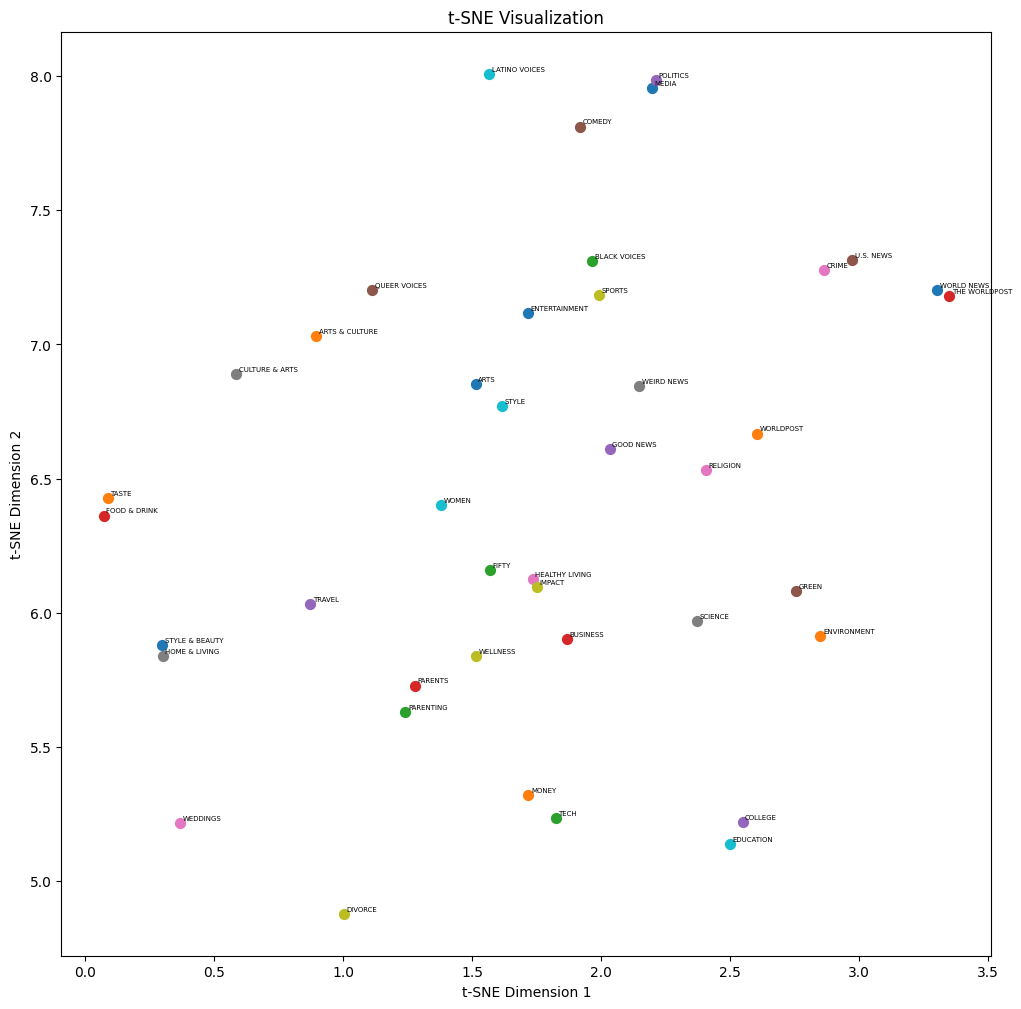

In [50]:
from sklearn.manifold import TSNE
cv = TfidfVectorizer ()
X = cv.fit_transform(grouped['headline']+ ' ' + grouped['short_description'])
print('Number of words in headline + short_description, ',X.shape[1])
class_vocab = {i: grouped.category[i] for i in range(len(grouped))}

feature_names = cv.get_feature_names_out()

words_vocab = {i: feature_names[i] for i in range(X.shape[1])}  


X = X.toarray()

tsne = TSNE()

clusters = tsne.fit_transform(X)
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot points with labels near each point
for class_idx, class_lab in enumerate(class_vocab.values()):
    x, y = clusters[class_idx, 0], clusters[class_idx, 1]
    ax.scatter(x, y, s=50)  # Plot the point
    ax.text(x + 0.01, y + 0.01, class_lab, fontsize=5)  # Annotate with the class label

# Customize the plot
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE Visualization")
plt.show()


Number of authors,  32889


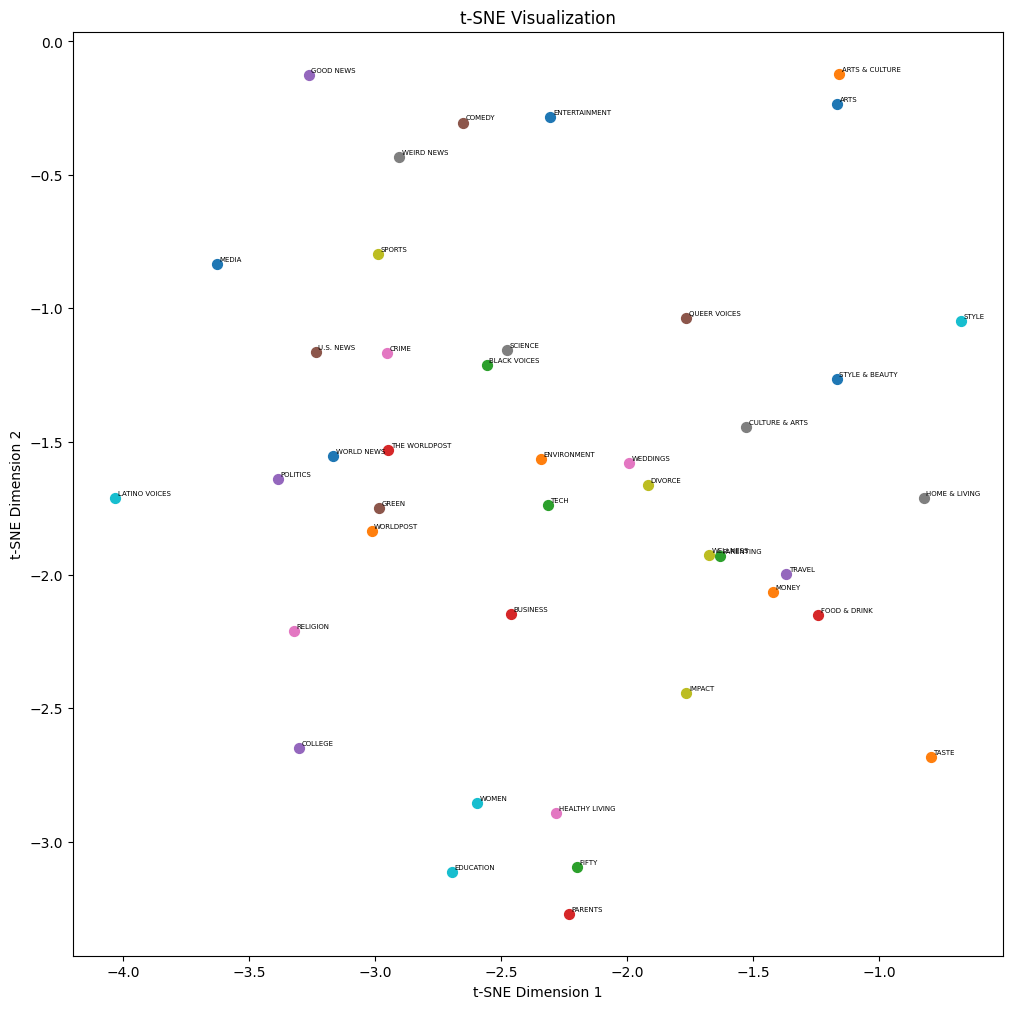

In [48]:
from sklearn.manifold import TSNE
cv = TfidfVectorizer ()
X = cv.fit_transform(grouped['authors'])
print('Number of authors, ',X.shape[1])
class_vocab = {i: grouped.category[i] for i in range(len(grouped))}

feature_names = cv.get_feature_names_out()

words_vocab = {i: feature_names[i] for i in range(X.shape[1])}  


X = X.toarray()

tsne = TSNE()

clusters = tsne.fit_transform(X)
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot points with labels near each point
for class_idx, class_lab in enumerate(class_vocab.values()):
    x, y = clusters[class_idx, 0], clusters[class_idx, 1]
    ax.scatter(x, y, s=50)  # Plot the point
    ax.text(x + 0.01, y + 0.01, class_lab, fontsize=5)  # Annotate with the class label

# Customize the plot
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE Visualization")
plt.show()


Number of words in links,  266669


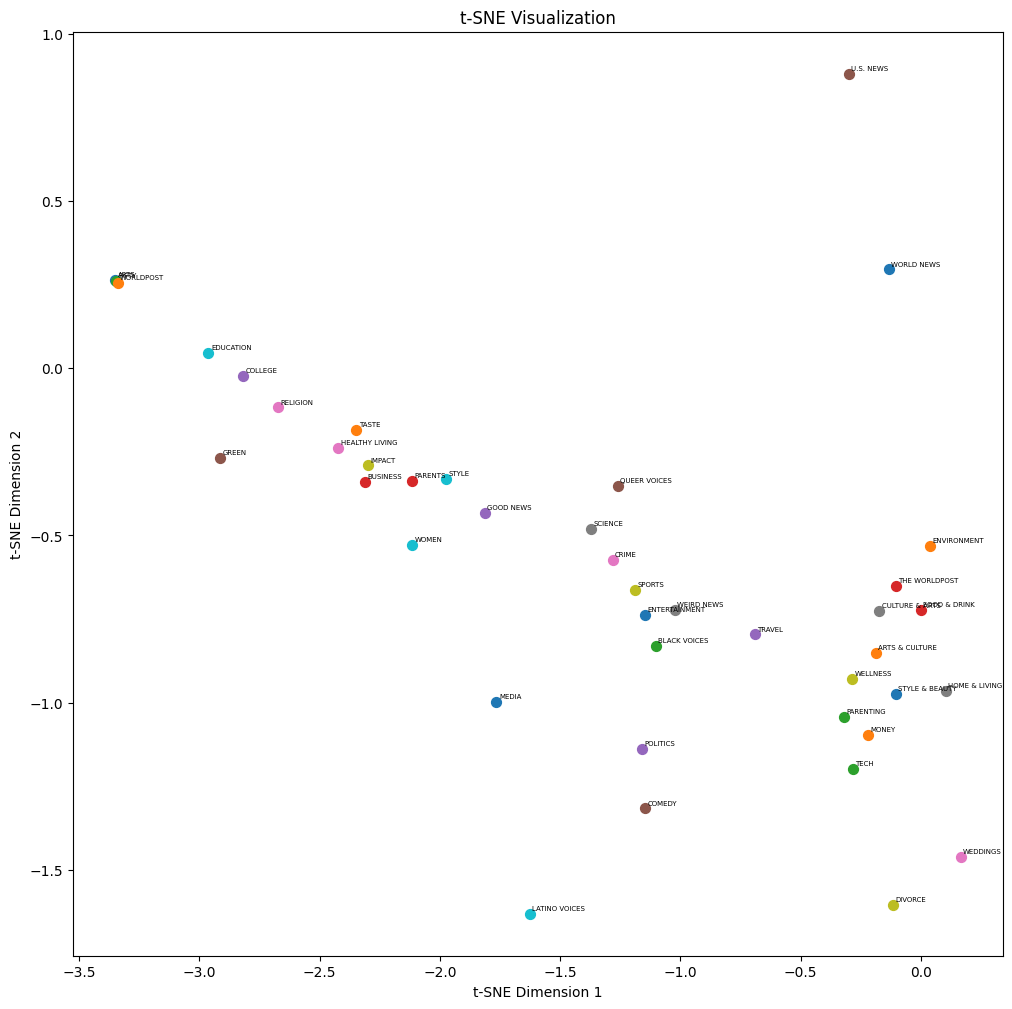

In [49]:
from sklearn.manifold import TSNE
cv = TfidfVectorizer ()
X = cv.fit_transform(grouped['link'])
print('Number of words in links, ',X.shape[1])
class_vocab = {i: grouped.category[i] for i in range(len(grouped))}

feature_names = cv.get_feature_names_out()

words_vocab = {i: feature_names[i] for i in range(X.shape[1])}  


X = X.toarray()

tsne = TSNE(perplexity=30)

clusters = tsne.fit_transform(X)
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot points with labels near each point
for class_idx, class_lab in enumerate(class_vocab.values()):
    x, y = clusters[class_idx, 0], clusters[class_idx, 1]
    ax.scatter(x, y, s=50)  # Plot the point
    ax.text(x + 0.01, y + 0.01, class_lab, fontsize=5)  # Annotate with the class label

# Customize the plot
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE Visualization")
plt.show()


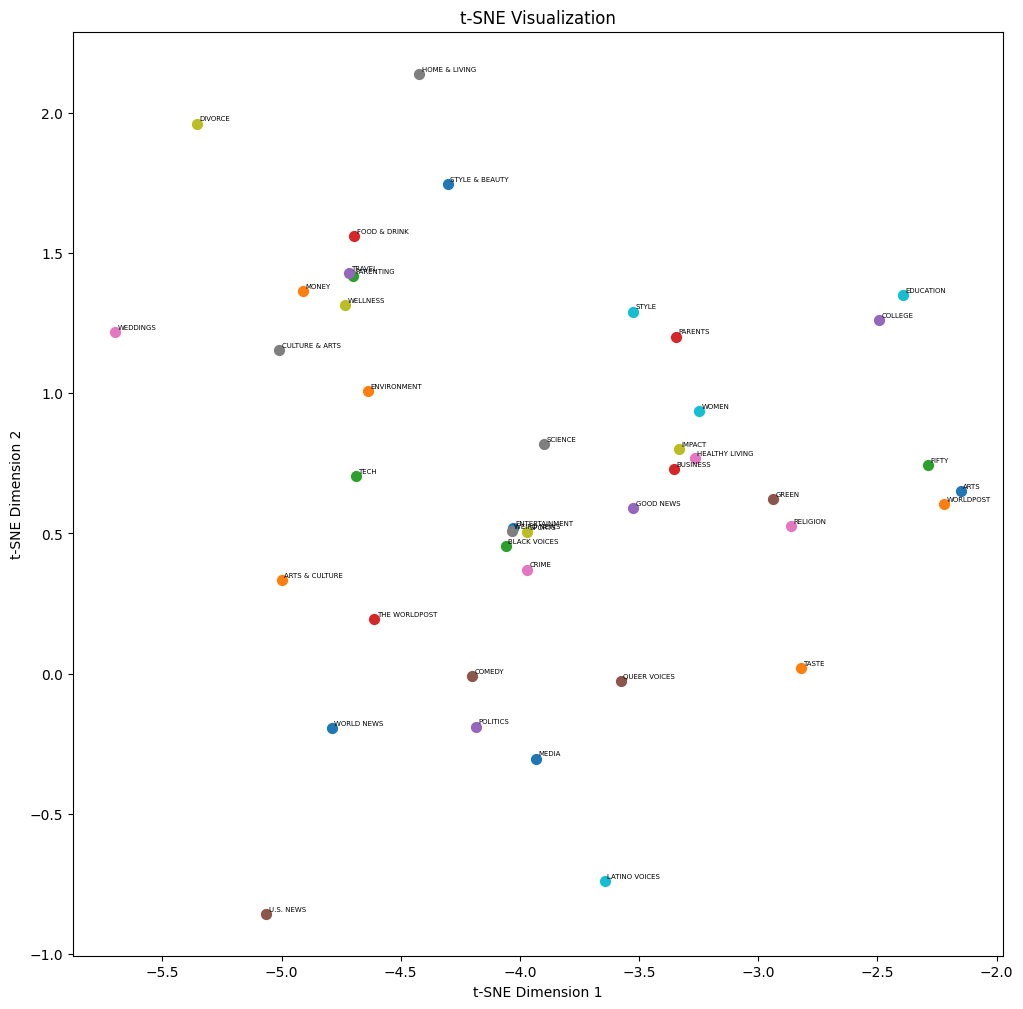

In [41]:
from sklearn.manifold import TSNE
cv = TfidfVectorizer ()
X = cv.fit_transform(grouped['headline']+ ' ' + grouped['short_description']+ ' ' + grouped['authors']+' ' + grouped['link'])

class_vocab = {i: grouped.category[i] for i in range(len(grouped))}

feature_names = cv.get_feature_names_out()

words_vocab = {i: feature_names[i] for i in range(X.shape[1])}  


X = X.toarray()

tsne = TSNE(perplexity=30)

clusters = tsne.fit_transform(X)
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot points with labels near each point
for class_idx, class_lab in enumerate(class_vocab.values()):
    x, y = clusters[class_idx, 0], clusters[class_idx, 1]
    ax.scatter(x, y, s=50)  # Plot the point
    ax.text(x + 0.01, y + 0.01, class_lab, fontsize=5)  # Annotate with the class label

# Customize the plot
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE Visualization")
plt.show()


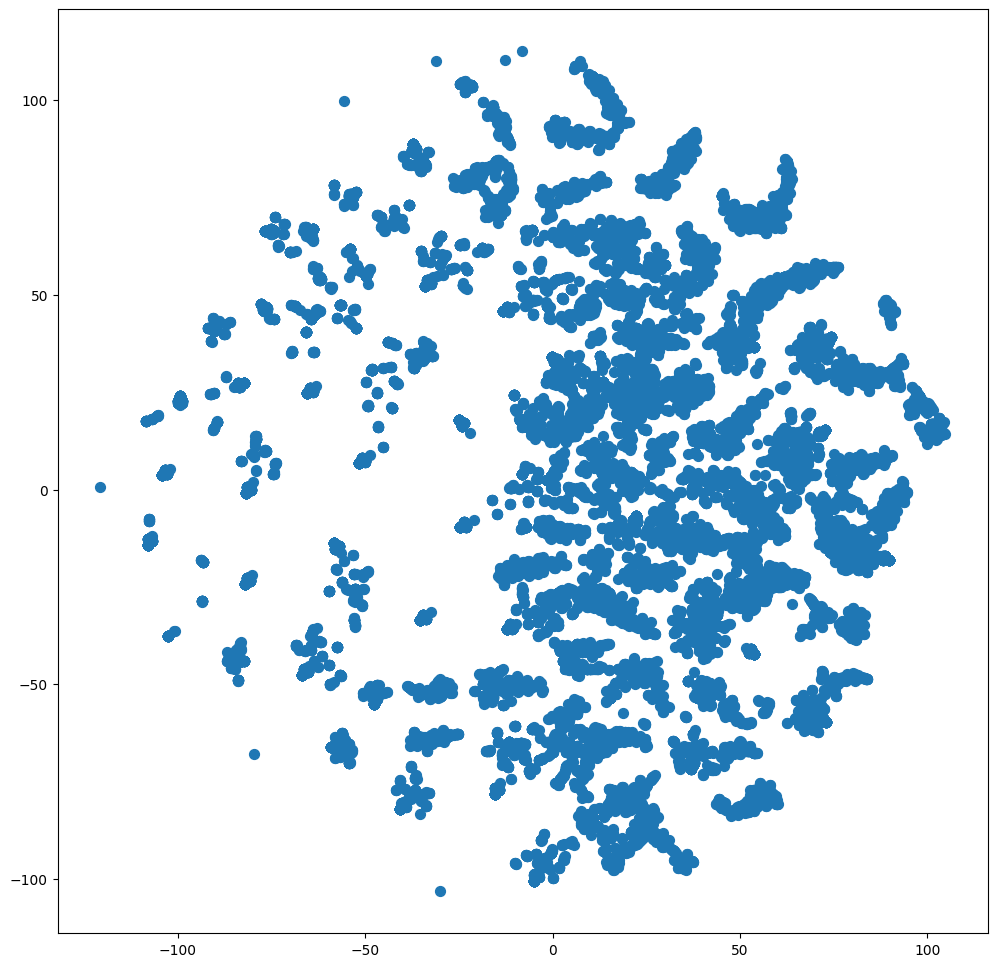

In [59]:
from sklearn.manifold import TSNE
cv = TfidfVectorizer ()
X = cv.fit_transform(grouped['authors']).T
print('Number of classes, ',X.shape[1])
class_vocab = {i: grouped.category[i] for i in range(len(grouped))}

feature_names = cv.get_feature_names_out()

words_vocab = {i: feature_names[i] for i in range(X.shape[1])}  


X = X.toarray()

tsne = TSNE()

clusters = tsne.fit_transform(X)#~3min
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
x, y = clusters[:, 0], clusters[:, 1]
ax.scatter(x, y, s=50)  # Plot the point
plt.show()